In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequality-white.csv', delimiter=";")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


# Etapa 1

## 1) Variável resposta:

R: Quality

## 2) Análise exploratória dos dados

In [3]:
df.shape

(4898, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
def create_box_plots(df):
    plt.figure(figsize=(16 , 10))
    for i, col in enumerate(df.columns):
        plt.subplot(4, 4, i + 1)
        df.boxplot(col)
        plt.tight_layout()

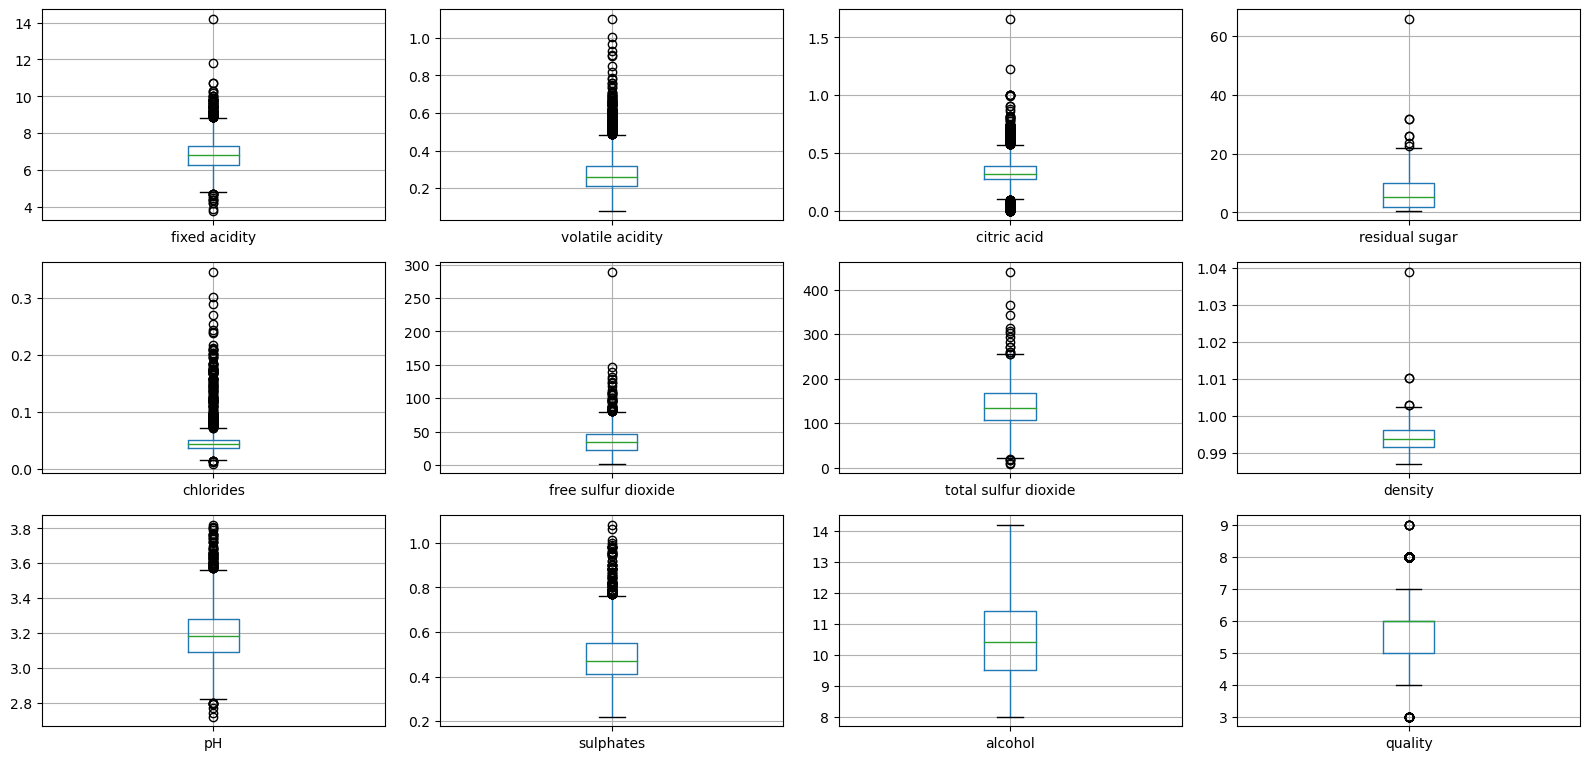

In [6]:
create_box_plots(df)

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

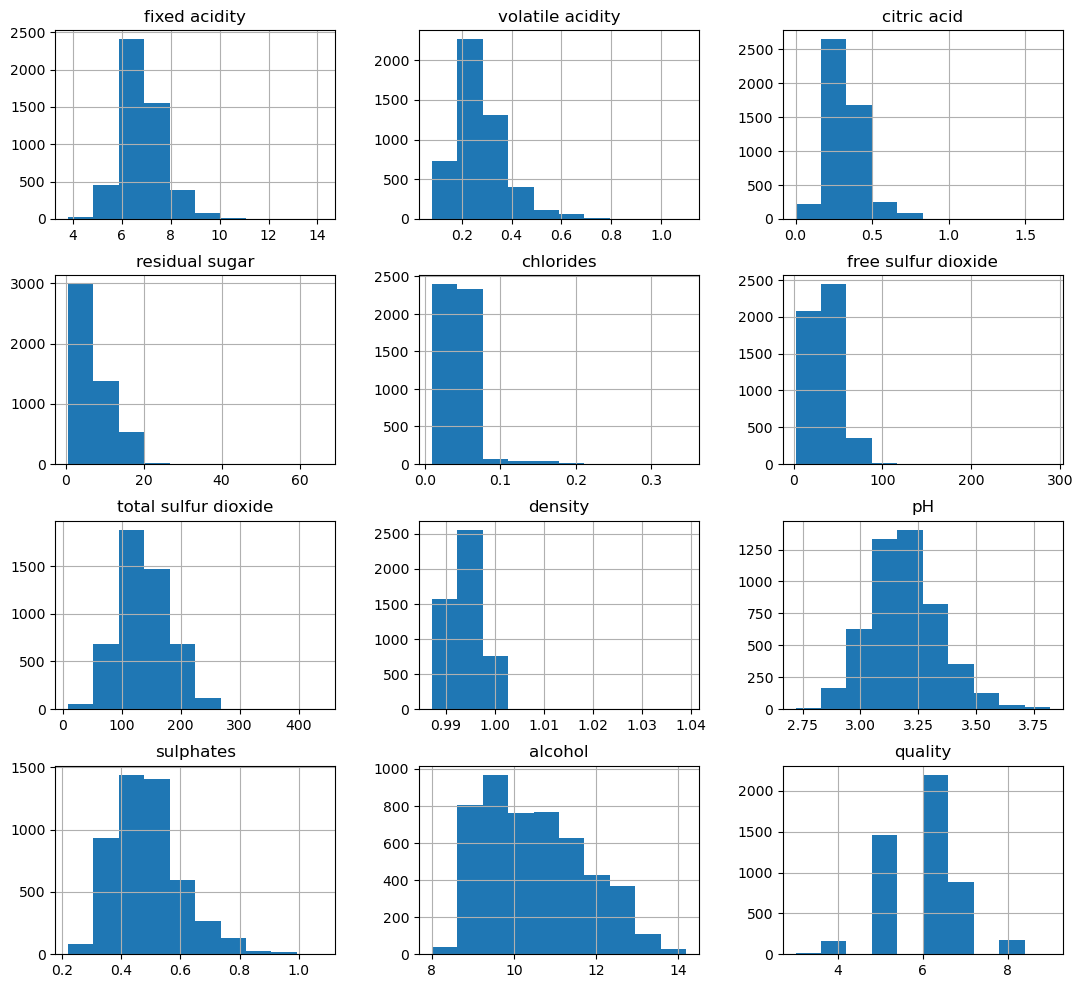

In [7]:
df.hist(figsize=(13, 12))

In [8]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Podemos notar um desbalanceamento nas classes que serão preditas. Isso pode gerar predições pobres para às classes com menos valores

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


## 3) Testando exclusão de outliers

In [10]:
df_transf = df.copy()
# Removendo pontos extremos com base no que foi observado nos boxplots
df_transf.drop(df_transf[(df_transf['residual sugar'] >= 25)].index, inplace=True)
df_transf.drop(df_transf[(df_transf['fixed acidity'] >= 10)].index, inplace=True)
df_transf.drop(df_transf[(df_transf['free sulfur dioxide'] >= 150)].index, inplace=True)
df_transf.drop(df_transf[(df_transf['citric acid'] >= .8)].index, inplace=True)
df_transf.drop(df_transf[(df_transf['volatile acidity'] >= .8)].index, inplace=True)

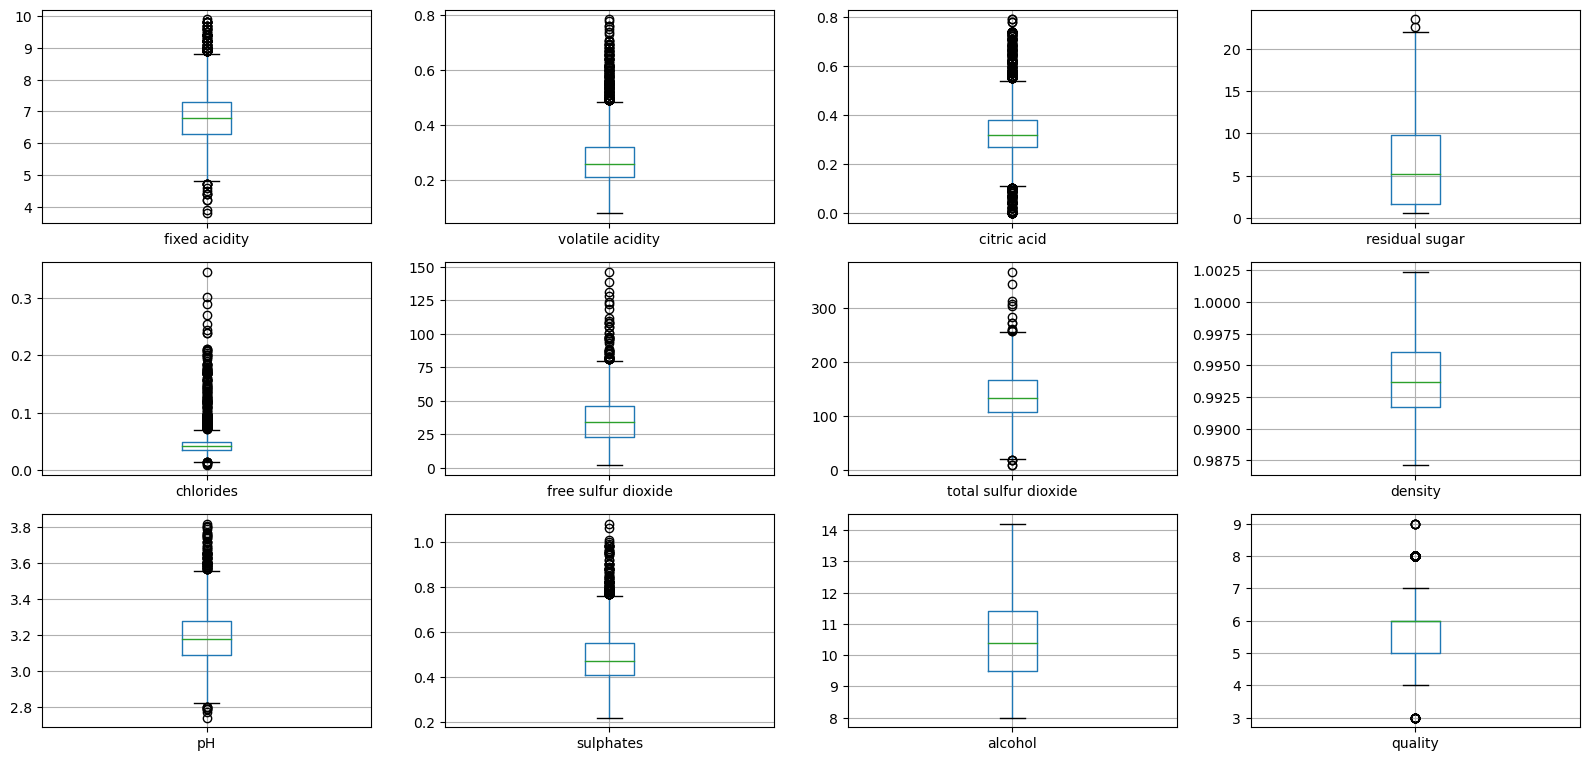

In [11]:
create_box_plots(df_transf)

In [12]:
print("SHAPE DO DF ORIGINAL:", df.shape)
print("SHAPE DO DF TRANSFORMADO:", df_transf.shape)

SHAPE DO DF ORIGINAL: (4898, 12)
SHAPE DO DF TRANSFORMADO: (4859, 12)


<AxesSubplot:>

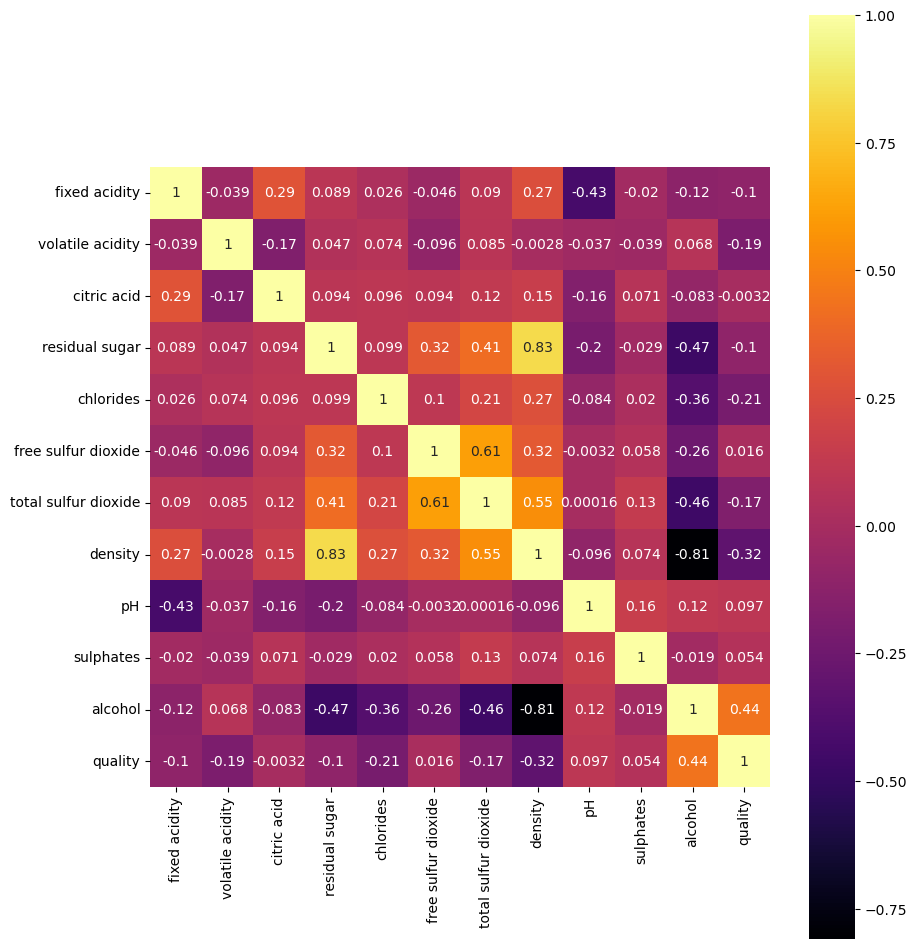

In [13]:
corr = df_transf.corr()
plt.figure(figsize=(10,12))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='inferno')

## 4) Amostra de Treinamento dos modelos e Validação 

In [14]:
X = df_transf.drop("quality", axis=1)
y = df_transf[["quality"]]

In [15]:
X_default = df.drop("quality", axis=1)
y_default = df[["quality"]]

### 5) Padronização dos dados

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)
X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X_default, y_default, test_size=.1, random_state=42)

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_def_scaled = scaler.fit_transform(X_train_def)
X_test_def_scaled = scaler.fit_transform(X_test_def)

## 7) Comparação de modelos

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

# Documentação de referência: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [21]:
knn = KNeighborsClassifier(n_neighbors = 5)
decision_tree = DecisionTreeClassifier(max_depth=4, criterion='gini', min_samples_split=5)
nbCat = CategoricalNB()
svm = LinearSVC(max_iter=500)
nbGau = GaussianNB()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier(learning_rate=0.001)


In [22]:
voting_clf = VotingClassifier(
    estimators=[('dt', decision_tree), ('knn', knn), ('nb', nbGau), ('svm', svm), ('rfc', rfc), ('gbc', gbc)], 
    n_jobs=-1)

voting_clf.fit(X_train_scaled, y_train)

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=4,
                                                     min_samples_split=5)),
                             ('knn', KNeighborsClassifier()),
                             ('nb', GaussianNB()),
                             ('svm', LinearSVC(max_iter=500)),
                             ('rfc', RandomForestClassifier()),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.001))],
                 n_jobs=-1)

In [23]:
from sklearn.metrics import classification_report

for clf in (decision_tree, knn,  nbGau, svm , voting_clf, rfc, gbc):
  clf.fit(X_train_scaled, y_train)
  y_hat = clf.predict(X_test_scaled)
  cr = classification_report(y_test, y_hat)
  print("Classificador: {} \n {}".format(clf.__class__.__name__, cr))

Classificador: DecisionTreeClassifier 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.10      0.17        10
           5       0.61      0.50      0.55       159
           6       0.49      0.76      0.59       209
           7       0.48      0.14      0.22        84
           8       0.00      0.00      0.00        22

    accuracy                           0.52       486
   macro avg       0.35      0.25      0.25       486
weighted avg       0.50      0.52      0.48       486

Classificador: KNeighborsClassifier 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.60      0.62      0.61       159
           6       0.58      0.65      0.62       209
           7       0.54      0.49      0.51        84
           8       0.67      0.09      0.16        22


/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classificador: VotingClassifier 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.10      0.17        10
           5       0.68      0.60      0.64       159
           6       0.53      0.83      0.65       209
           7       0.76      0.15      0.26        84
           8       0.00      0.00      0.00        22

    accuracy                           0.58       486
   macro avg       0.41      0.28      0.29       486
weighted avg       0.59      0.58      0.54       486

Classificador: RandomForestClassifier 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.30      0.37        10
           5       0.76      0.70      0.73       159
           6       0.67      0.82      0.74       209
           7       0.69      0.57      0.62        84
           8       1.00      0.41      0.58        22

   

In [24]:
for feature, importancia in zip(X_train.columns, rfc.feature_importances_):
    print("{}:{}".format(feature, importancia * 100))

fixed acidity:7.355156018018261
volatile acidity:10.11021072355016
citric acid:7.917389453826
residual sugar:8.959084747236385
chlorides:8.686071568375674
free sulfur dioxide:9.45326947918995
total sulfur dioxide:9.092343524407942
density:10.194879730448012
pH:8.471873728372351
sulphates:8.039336920238489
alcohol:11.720384106336793


In [25]:
param_grid_rfc = {
    'bootstrap': [True],
    'max_depth': [None, 50, 60, 70, 80, 90, 100, 110],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid_rfc, 
#                           cv = 3, n_jobs = -1, verbose = 2)

# grid_search.fit(X_train, y_train)
# grid_search.best_params_

BEST GRID PARAMS FOR RANDOM FOREST

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1000}

### Random forest sem outliers

In [26]:
rfc = RandomForestClassifier(
    bootstrap=True,
    max_depth=70,
    min_samples_leaf= 2,
    min_samples_split=2,
    n_estimators=1000
)

In [27]:
best_grid = rfc
best_grid.fit(X_train_scaled, y_train)
y_hat = best_grid.predict(X_test_scaled)

In [28]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.10      0.18        10
           5       0.78      0.70      0.74       159
           6       0.65      0.85      0.74       209
           7       0.70      0.54      0.61        84
           8       1.00      0.27      0.43        22

    accuracy                           0.70       486
   macro avg       0.69      0.41      0.45       486
weighted avg       0.72      0.70      0.69       486



### Random forest com os outliers

In [29]:
rfc = RandomForestClassifier(
    bootstrap=True,
    max_depth=70,
    min_samples_leaf= 2,
    min_samples_split=2,
    n_estimators=1000
)

In [30]:
rfc.fit(X_train_def_scaled, y_train_def)
y_hat = rfc.predict(X_test_def_scaled)

In [31]:
print(classification_report(y_test_def, y_hat))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.06      0.11        18
           5       0.68      0.69      0.69       144
           6       0.67      0.83      0.74       215
           7       0.74      0.59      0.65        94
           8       1.00      0.25      0.40        16

    accuracy                           0.69       490
   macro avg       0.68      0.40      0.43       490
weighted avg       0.71      0.69      0.67       490



#### Conclusão

Os modelos de Random Forest tiveram a performance semelhante com ou sem outliers. Seguiremos com o dataset sem outliers para não influênciar na performance de outros tipos de modelos.

### Analise de importância das variáveis preditas pelo random forest

In [32]:
important_features = []
for feature, importancia in zip(X_train.columns, rfc.feature_importances_):
    importancia = importancia * 100
    print("{}:{}".format(feature, np.round(importancia, 2)))
    if (np.round(importancia, 2) >= 8.8): # Threshold de 8.8 para realizar a seleção de features 
        important_features.append(feature)

fixed acidity:7.28
volatile acidity:10.3
citric acid:8.0
residual sugar:8.91
chlorides:8.4
free sulfur dioxide:9.32
total sulfur dioxide:9.04
density:10.5
pH:8.44
sulphates:7.67
alcohol:12.14


In [33]:
def f_importances(coef, names):
    imp = coef * 100
    imp, names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [34]:
important_features

['volatile acidity',
 'residual sugar',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'alcohol']

# Etapa 2

## Obtendo os vinhos com a melhor avaliação

In [35]:
df_best_choices = df_transf[(df_transf['quality'] >= 6)] 

df_best_choices.shape

(3237, 12)

In [36]:
df_best_choices.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 2) Análise exploratória

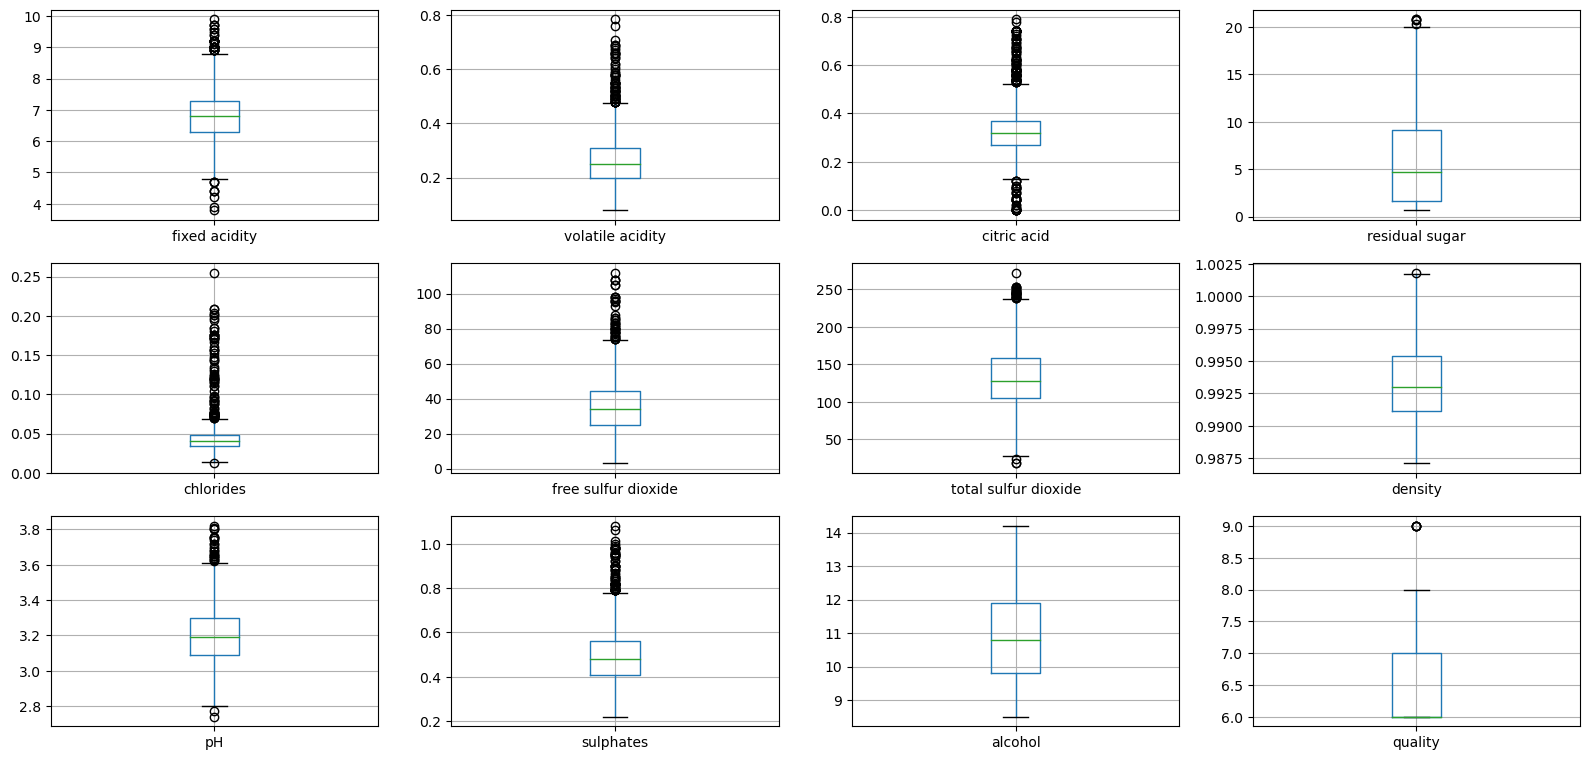

In [37]:
create_box_plots(df_best_choices)

In [38]:
df_best_choices.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000
mean,6.792292,0.261698,0.331566,6.003985,0.042817,35.273247,133.046339,0.993421,3.197813,0.494214,10.850772,6.384615
std,0.798350,0.089223,0.099572,4.738463,0.017969,15.149941,39.032688,0.002887,0.153155,0.120253,1.246580,0.595137
min,3.800000,0.080000,0.000000,0.700000,0.012000,3.000000,18.000000,0.987110,2.740000,0.220000,8.500000,6.000000
25%,6.300000,0.200000,0.270000,1.700000,0.034000,25.000000,105.000000,0.991160,3.090000,0.410000,9.800000,6.000000
50%,6.800000,0.250000,0.320000,4.700000,0.040000,34.000000,128.000000,0.992960,3.190000,0.480000,10.800000,6.000000
75%,7.300000,0.310000,0.370000,9.100000,0.048000,44.500000,158.000000,0.995410,3.300000,0.560000,11.900000,7.000000
max,9.900000,0.785000,0.790000,20.800000,0.255000,112.000000,272.000000,1.001820,3.820000,1.080000,14.200000,9.000000


## 4) Amostras de treinamento dos modelos de validação

In [39]:
# Features selecionadas de acordo com o grau de importância gerado pelo Random Forest na etapa anterior
X = df_best_choices[important_features]
y = df_best_choices[['quality']]

X.head()

,volatile acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,density,alcohol
0,0.27,20.7,45.0,170.0,1.0010,8.8
1,0.30,1.6,14.0,132.0,0.9940,9.5
2,0.28,6.9,30.0,97.0,0.9951,10.1
3,0.23,8.5,47.0,186.0,0.9956,9.9
4,0.23,8.5,47.0,186.0,0.9956,9.9


## 5) Padronização dos dados

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

## 7) Comparação de modelos

In [41]:
from sklearn.svm import SVC

In [42]:
knn = KNeighborsClassifier(n_neighbors = 8)
svm = SVC(C=3, random_state=42)
rfc = RandomForestClassifier(
    max_depth=30,
    min_samples_leaf= 2,
    min_samples_split=4,
    random_state=42,
    n_estimators=600)

In [43]:
voting_clf = VotingClassifier(
    estimators=[('knn', knn), ('svm', svm), ('rfc', rfc)], 
    n_jobs=-1)

voting_clf.fit(X_train_std, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=8)),
                             ('svm', SVC(C=3, random_state=42)),
                             ('rfc',
                              RandomForestClassifier(max_depth=30,
                                                     min_samples_leaf=2,
                                                     min_samples_split=4,
                                                     n_estimators=600,
                                                     random_state=42))],
                 n_jobs=-1)

In [44]:
for clf in (knn, svm, rfc):
  clf.fit(X_train_std, y_train)
  y_hat = clf.predict(X_test_std)
  cr = classification_report(y_test, y_hat)
  print("Classificador: {} \n {}".format(clf.__class__.__name__, cr))

Classificador: KNeighborsClassifier 
               precision    recall  f1-score   support

           6       0.77      0.89      0.82       221
           7       0.48      0.36      0.41        86
           8       0.25      0.07      0.11        15
           9       0.00      0.00      0.00         2

    accuracy                           0.70       324
   macro avg       0.38      0.33      0.34       324
weighted avg       0.66      0.70      0.68       324

Classificador: SVC 
               precision    recall  f1-score   support

           6       0.74      0.95      0.83       221
           7       0.51      0.23      0.32        86
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00         2

    accuracy                           0.71       324
   macro avg       0.31      0.29      0.29       324
weighted avg       0.64      0.71      0.65       324

Classificador: RandomForestClassifier 
               precision    reca

In [45]:
def predict(model, X):
    y_hat = model.predict(X)
    return y_hat

In [46]:
y_hat_rfc = predict(rfc, X_train_std)
y_hat_svm = predict(svm, X_train_std)

In [47]:
print("RANDOM FOREST: \n", classification_report(y_train, y_hat_rfc))
print("SVM: \n", classification_report(y_train, y_hat_svm))

RANDOM FOREST: 
               precision    recall  f1-score   support

           6       0.97      1.00      0.98      1956
           7       0.99      0.95      0.97       794
           8       1.00      0.79      0.89       160
           9       0.00      0.00      0.00         3

    accuracy                           0.97      2913
   macro avg       0.74      0.69      0.71      2913
weighted avg       0.97      0.97      0.97      2913

SVM: 
               precision    recall  f1-score   support

           6       0.73      0.94      0.82      1956
           7       0.58      0.28      0.37       794
           8       0.67      0.03      0.05       160
           9       0.00      0.00      0.00         3

    accuracy                           0.71      2913
   macro avg       0.49      0.31      0.31      2913
weighted avg       0.69      0.71      0.66      2913



Apesar do Random forest contar com predições mais acuradas do que o SVM, podemos notar que quando predizemos o conjunto de treinamento e comparamos com o de teste, vemos uma diferença de aproximadamente de 20%, ou seja, ele decorou o conjunto de treino e não está generalizando muito bem.

Por isso, vamos contar com o SVM nessa etapa.

## (Conclusão 1 e 2) Determinando vinhos de boa qualidade com base nas features escolhidas

<p> Para saber se o vinho é de boa qualidade, é necessário se ter as informações abaixo: </p>

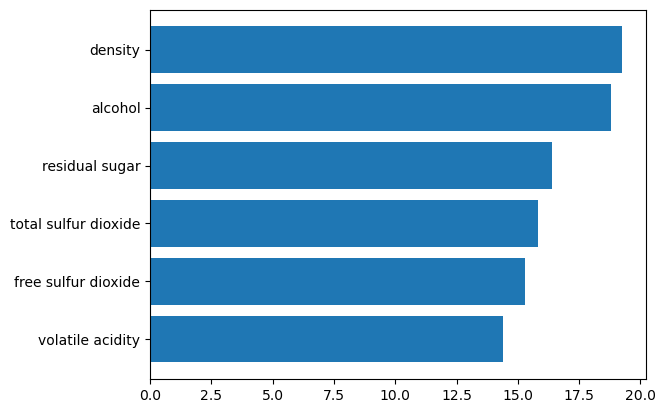

In [48]:
# Importância de cada feature para a random forest
f_importances(rfc.feature_importances_, X_train.columns)

# Etapa 3

## Análise exploratória dos dados

In [49]:
df_best_choices_kmeans = df_best_choices.copy()
df_best_choices_kmeans = df_best_choices_kmeans[important_features]
df_best_choices_kmeans['quality'] = df_best_choices['quality']
df_best_choices_kmeans.head()

,volatile acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality
0,0.27,20.7,45.0,170.0,1.0010,8.8,6
1,0.30,1.6,14.0,132.0,0.9940,9.5,6
2,0.28,6.9,30.0,97.0,0.9951,10.1,6
3,0.23,8.5,47.0,186.0,0.9956,9.9,6
4,0.23,8.5,47.0,186.0,0.9956,9.9,6


array([[<AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'alcohol'}>],
       [<AxesSubplot:title={'center':'quality'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

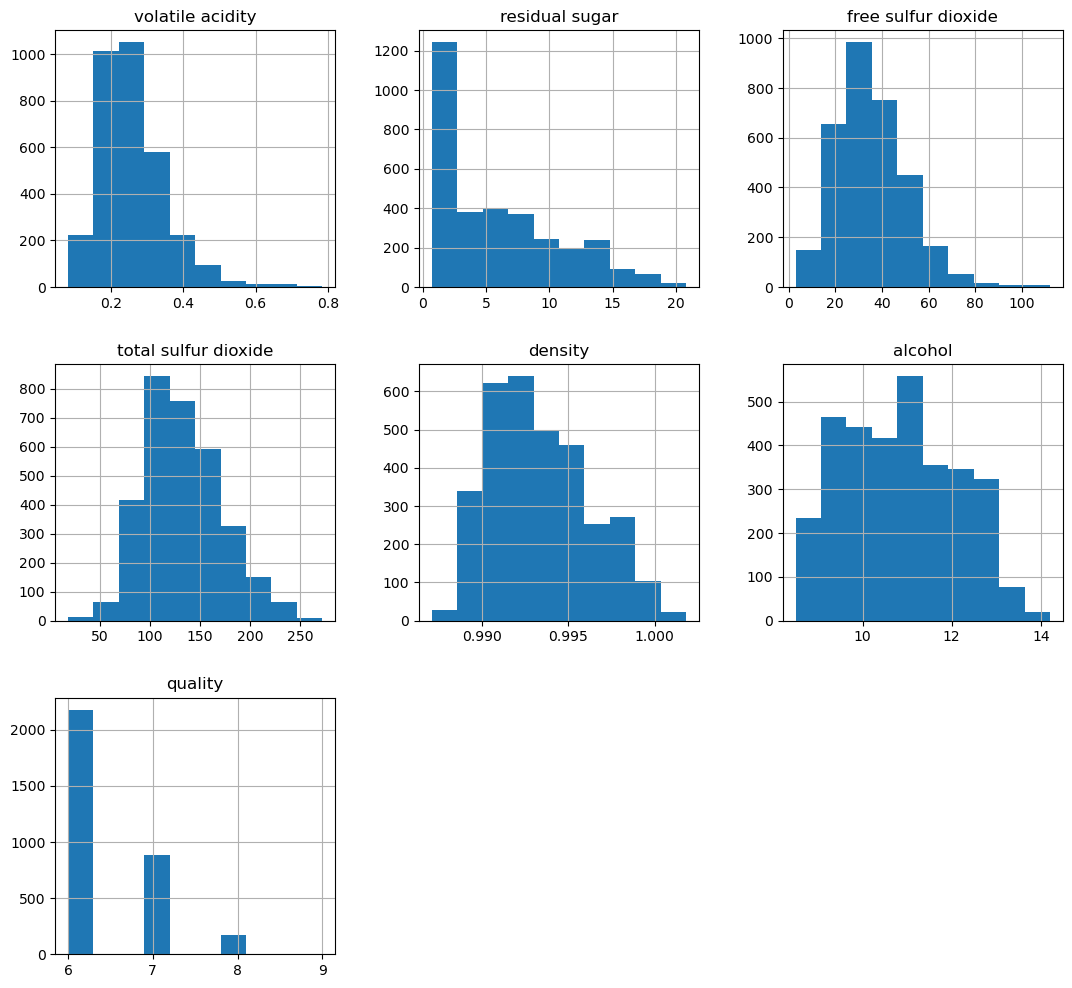

In [50]:
df_best_choices_kmeans.hist(figsize=(13, 12))

In [51]:
df_best_choices_kmeans.describe()

,volatile acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality
count,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000
mean,0.261698,6.003985,35.273247,133.046339,0.993421,10.850772,6.384615
std,0.089223,4.738463,15.149941,39.032688,0.002887,1.246580,0.595137
min,0.080000,0.700000,3.000000,18.000000,0.987110,8.500000,6.000000
25%,0.200000,1.700000,25.000000,105.000000,0.991160,9.800000,6.000000
50%,0.250000,4.700000,34.000000,128.000000,0.992960,10.800000,6.000000
75%,0.310000,9.100000,44.500000,158.000000,0.995410,11.900000,7.000000
max,0.785000,20.800000,112.000000,272.000000,1.001820,14.200000,9.000000


In [52]:
df_bc_scaled_kmeans = scaler.fit_transform(df_best_choices_kmeans)

## Criação do modelo k-means (Cluster)

<p>A quantidade clusters esclhida foi atráves do métdo de Elbow</p>

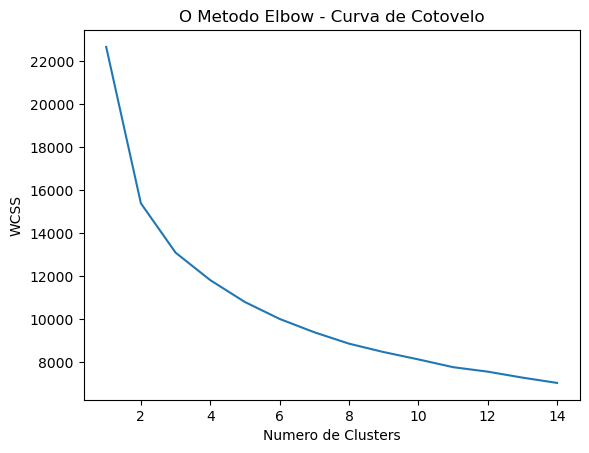

In [53]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 800, n_init = 10, random_state = 42)
    kmeans.fit(df_bc_scaled_kmeans)
    wcss.append(kmeans.inertia_)
    
# Mostra o Gráfico
plt.plot(range(1, 15), wcss)
plt.title('O Metodo Elbow - Curva de Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
from sklearn.metrics import silhouette_score

for i in range(1, 15):
    preds = kmeans.predict(df_bc_scaled_kmeans)
    score = silhouette_score(df_bc_scaled_kmeans, preds)
    print('Silhueta para ' + str(i) + ' clusters : ' + str(score))

Silhueta para 1 clusters : 0.17052176049976872
Silhueta para 2 clusters : 0.17052176049976872
Silhueta para 3 clusters : 0.17052176049976872
Silhueta para 4 clusters : 0.17052176049976872
Silhueta para 5 clusters : 0.17052176049976872
Silhueta para 6 clusters : 0.17052176049976872
Silhueta para 7 clusters : 0.17052176049976872
Silhueta para 8 clusters : 0.17052176049976872
Silhueta para 9 clusters : 0.17052176049976872
Silhueta para 10 clusters : 0.17052176049976872
Silhueta para 11 clusters : 0.17052176049976872
Silhueta para 12 clusters : 0.17052176049976872
Silhueta para 13 clusters : 0.17052176049976872
Silhueta para 14 clusters : 0.17052176049976872


In [55]:
labels = kmeans.labels_
labels

array([ 4,  2, 10, ...,  2,  8,  3], dtype=int32)

In [56]:
## Adicionando o cluste_id como feature
df_best_choices_kmeans["Cluster_id"] = labels
df_best_choices_kmeans.head()

,volatile acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality,Cluster_id
0,0.27,20.7,45.0,170.0,1.0010,8.8,6,4
1,0.30,1.6,14.0,132.0,0.9940,9.5,6,2
2,0.28,6.9,30.0,97.0,0.9951,10.1,6,10
3,0.23,8.5,47.0,186.0,0.9956,9.9,6,6
4,0.23,8.5,47.0,186.0,0.9956,9.9,6,6


In [57]:
df_best_choices_kmeans.isnull().sum()

volatile acidity        0
residual sugar          0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
alcohol                 0
quality                 0
Cluster_id              0
dtype: int64

<AxesSubplot:>

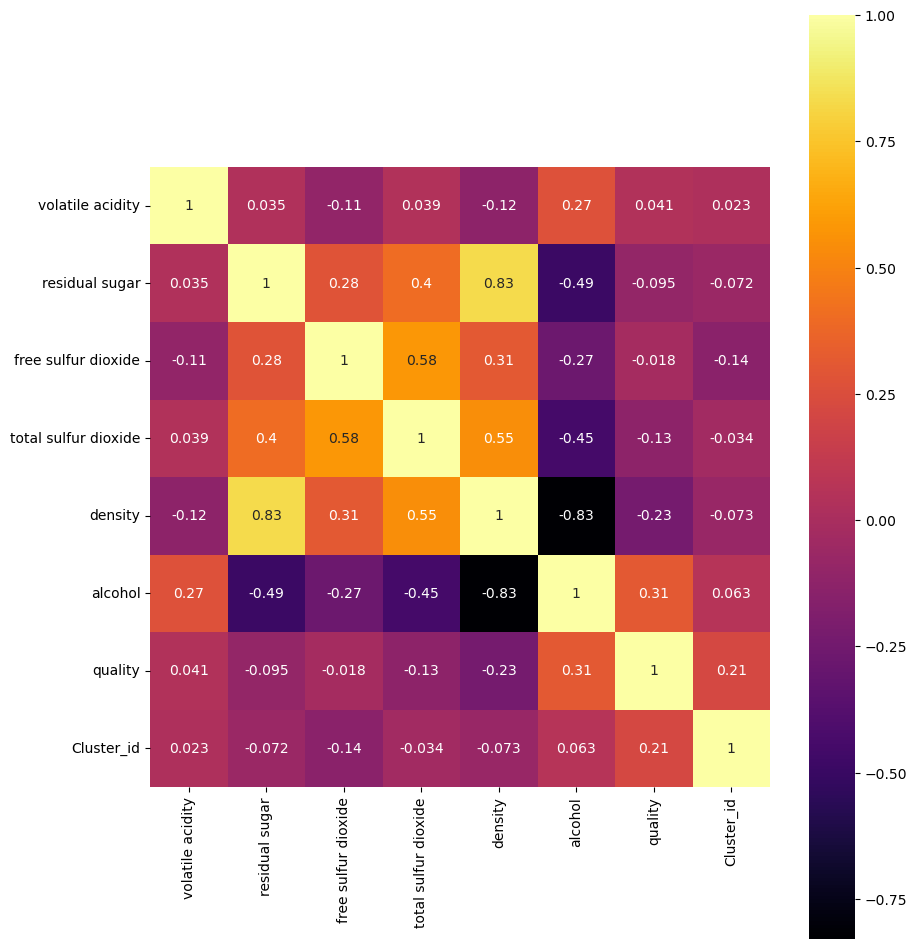

In [58]:
corr = df_best_choices_kmeans.corr()
plt.figure(figsize=(10,12))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='inferno')

## Qualidades do vinho por Cluster

(0, 7) - O primeiro valor entre parênteses é o ClusterID e o segundo valor é referente a nota do vinho.

In [59]:
df_best_choices_kmeans.groupby(["Cluster_id"])['quality'].value_counts().to_dict()

{(0, 7): 156,
 (0, 8): 32,
 (1, 6): 167,
 (2, 6): 327,
 (3, 6): 294,
 (4, 6): 203,
 (5, 6): 119,
 (5, 7): 11,
 (6, 6): 285,
 (6, 7): 5,
 (7, 6): 198,
 (8, 7): 245,
 (8, 8): 64,
 (8, 9): 3,
 (9, 7): 132,
 (9, 8): 29,
 (9, 9): 1,
 (10, 6): 269,
 (11, 7): 102,
 (11, 8): 17,
 (12, 7): 228,
 (12, 8): 33,
 (12, 9): 1,
 (13, 6): 315,
 (13, 7): 1}

## Quantidade vinhos por cluster

Text(0, 0.5, 'Quantidade de vinhos por cluster')

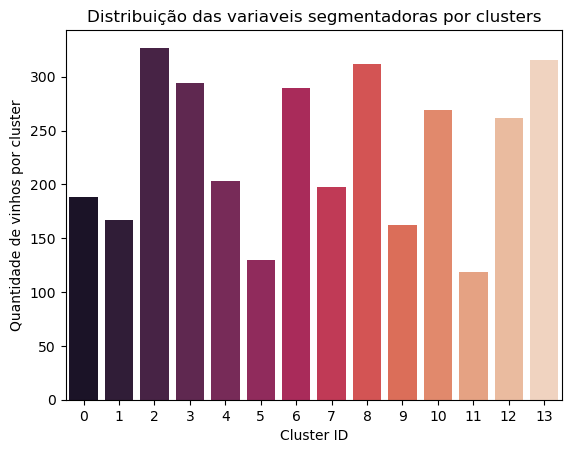

In [60]:
sns.color_palette("rocket")
sns.barplot(x=df_best_choices_kmeans["Cluster_id"].value_counts().index, 
    y=df_best_choices_kmeans["Cluster_id"].value_counts(), palette="rocket")

plt.title('Distribuição das variaveis segmentadoras por clusters')
plt.xlabel("Cluster ID",fontsize = 10)
plt.ylabel("Quantidade de vinhos por cluster",fontsize = 10)


# Etapa 4

### Aplicação do PCA

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6) # Número de componentes escolhido de forma arbitrária

In [62]:
df_to_pca = df_best_choices_kmeans.copy()
df_to_pca.head()

,volatile acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality,Cluster_id
0,0.27,20.7,45.0,170.0,1.0010,8.8,6,4
1,0.30,1.6,14.0,132.0,0.9940,9.5,6,2
2,0.28,6.9,30.0,97.0,0.9951,10.1,6,10
3,0.23,8.5,47.0,186.0,0.9956,9.9,6,6
4,0.23,8.5,47.0,186.0,0.9956,9.9,6,6


In [63]:
X = df_to_pca.drop("quality", axis=1)
y = df_to_pca["quality"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)

In [65]:
X_train_pca_scaled = scaler.fit_transform(X_train)

In [66]:
pca.fit(X_train_pca_scaled)

PCA(n_components=6)

In [67]:
print('Auto-valores:')
print(pca.explained_variance_)
print()

Auto-valores:
[3.10320636 1.09896951 1.04993352 0.93482686 0.46767825 0.30639251]



In [68]:
print('Variância Explicada:')
print(pca.explained_variance_ratio_)
print()

Variância Explicada:
[0.44316301 0.15694175 0.14993901 0.13350085 0.06678824 0.04375533]



In [69]:
print('Auto-vetores:')
print(pca.components_)
print()

Auto-vetores:
[[-0.09644683  0.44618738  0.33187591  0.41911545  0.53053553 -0.4662406
  -0.08346979]
 [ 0.83581434  0.10045979  0.26129924  0.32497786 -0.09627453  0.31098032
  -0.10703633]
 [-0.31952212 -0.28890608  0.4815243   0.11977901 -0.22858943  0.10709215
  -0.71028471]
 [-0.2220681  -0.29671843  0.4703725   0.36940997 -0.19661879  0.08381436
   0.67767701]
 [ 0.21387244 -0.62274803 -0.36262265  0.39683239  0.00578243 -0.51683128
  -0.10160868]
 [-0.30799116  0.19964055 -0.48344714  0.6321794  -0.0184705   0.47338651
  -0.08647091]]



In [70]:
from pandas import DataFrame

loadings = DataFrame(pca.components_.T)
loadings.index = ['PC %s' % pc for pc in loadings.index + 1]
loadings.columns = ['TS %s' % pc for pc in loadings.columns + 1]
loadings

,TS 1,TS 2,TS 3,TS 4,TS 5,TS 6
PC 1,-0.096447,0.835814,-0.319522,-0.222068,0.213872,-0.307991
PC 2,0.446187,0.100460,-0.288906,-0.296718,-0.622748,0.199641
PC 3,0.331876,0.261299,0.481524,0.470373,-0.362623,-0.483447
PC 4,0.419115,0.324978,0.119779,0.369410,0.396832,0.632179
PC 5,0.530536,-0.096275,-0.228589,-0.196619,0.005782,-0.018470
PC 6,-0.466241,0.310980,0.107092,0.083814,-0.516831,0.473387
PC 7,-0.083470,-0.107036,-0.710285,0.677677,-0.101609,-0.086471


In [71]:
loadings.shape

(7, 6)

In [72]:
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(324, 6)

### Utilizando features com o PCA aplicado

In [73]:
X_train_pca = pca.transform(X_train)
X_train_pca.shape

(2913, 6)

In [74]:
print(X_train_pca.shape, X_test_pca.shape)

(2913, 6) (324, 6)


## Predições com PCA

### Random forest

In [75]:
rfc = RandomForestClassifier()
param_grid_rfc = {
    'bootstrap': [False],
    'max_depth': [None, 10, 15, 20, 30],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8],
    'n_estimators': [50, 100, 150]
}

Utilizando a técnica de grid search para obter a melhor combinação de hiperparâmetros

In [76]:
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid_rfc, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train_pca, y_train)
grid_search.best_params_

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[CV] END bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total t

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 50}

In [77]:
best_rfc = grid_search.best_estimator_

In [78]:
y_hat = best_rfc.predict(X_test_pca)

In [79]:
y_hat_2 = best_rfc.predict(X_train_pca)

In [80]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           6       0.92      0.95      0.94       221
           7       0.81      0.74      0.78        86
           8       0.53      0.53      0.53        15
           9       0.00      0.00      0.00         2

    accuracy                           0.87       324
   macro avg       0.57      0.56      0.56       324
weighted avg       0.87      0.87      0.87       324



In [81]:
print(classification_report(y_train, y_hat_2))

              precision    recall  f1-score   support

           6       1.00      1.00      1.00      1956
           7       1.00      1.00      1.00       794
           8       1.00      0.99      1.00       160
           9       1.00      1.00      1.00         3

    accuracy                           1.00      2913
   macro avg       1.00      1.00      1.00      2913
weighted avg       1.00      1.00      1.00      2913



### Predições com SVM

In [82]:
svm = SVC()

In [83]:
param_grid_svm = {
    'C': [5, 10],
    'kernel': ['rbf']
}

Utilizando a técnica de grid search para obter a melhor combinação de hiperparâmetros

In [84]:
grid_search = GridSearchCV(estimator = svm, param_grid = param_grid_svm, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train_pca, y_train)
grid_search.best_params_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ....................................C=5, kernel=rbf; total time=   0.3s
[CV] END ....................................C=5, kernel=rbf; total time=   0.3s
[CV] END ...................................C=10, kernel=rbf; total time=   0.3s
[CV] END ...................................C=10, kernel=rbf; total time=   0.3s
[CV] END ....................................C=5, kernel=rbf; total time=   0.3s
[CV] END ...................................C=10, kernel=rbf; total time=   0.4s


{'C': 10, 'kernel': 'rbf'}

In [85]:
best_svm = grid_search.best_estimator_
y_hat_svm = best_svm.predict(X_test_pca)

In [86]:
print(classification_report(y_test, y_hat_svm))

              precision    recall  f1-score   support

           6       0.83      0.96      0.89       221
           7       0.69      0.55      0.61        86
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00         2

    accuracy                           0.80       324
   macro avg       0.38      0.38      0.37       324
weighted avg       0.75      0.80      0.77       324



## Conclusão

Com a redução de dimensionalidade dos dados obtida através do PCA, os modelos selecionados tiveram a performance melhorada em comparação aos modelos sem o PCA. (Comparar etapa 1 e 2 com a 4). 

Embora o SVM tenha gerado uma boa acurácia, a predição para as notas 8 e 9 foram totalmente pobres, diferente do modelo Random Forest embora esteja com overfitting.

Então, o uso do PCA é indicado para trabalhar nesse dataset.